In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

plt.rcParams["font.size"] = 18

cmap = {
    "E-ANN-1": "crimson",
    "WLF-IMQ": "dodgerblue",
    "EKF": "lightseagreen",
    "WLF-MD": "gold", # TODO: make more o-paco
    "OGD": "blueviolet"
}

In [24]:
path_base = "./results"
dataset_name = "kin8nm"
# dataset_name = "yacht"
experiment_names = [f for f in os.listdir(path_base) if ("-target" in f) and ("p-error" in f) and (dataset_name in f)]
sorted(experiment_names)

['kin8nm-target-p-error00.pkl',
 'kin8nm-target-p-error05.pkl',
 'kin8nm-target-p-error10.pkl',
 'kin8nm-target-p-error15.pkl',
 'kin8nm-target-p-error20.pkl',
 'kin8nm-target-p-error25.pkl',
 'kin8nm-target-p-error30.pkl',
 'kin8nm-target-p-error35.pkl',
 'kin8nm-target-p-error40.pkl',
 'kin8nm-target-p-error45.pkl',
 'kin8nm-target-p-error50.pkl']

In [25]:
df_all = []
for file in experiment_names:
    with open(os.path.join(path_base, file), "rb") as f:
        res = pickle.load(f)
    
    errors = res["methods"]
    for method in errors:
        part = np.sqrt(errors[method].median(axis=0))
        part.name  = "RMedSE"
        part = pd.DataFrame(part)
        part["method"] = method
        part["p_error"] = res["config"]["p_error"]
        
        df_all.append(part)
df_all = pd.concat(df_all, axis=0)

In [26]:
df_all.head()

,RMedSE,method,p_error
0,0.136267,WLF-IMQ,0.25
1,0.129028,WLF-IMQ,0.25
2,0.131092,WLF-IMQ,0.25
3,0.135517,WLF-IMQ,0.25
4,0.138414,WLF-IMQ,0.25


In [27]:
void_methods = ["EKF", "OGD"]

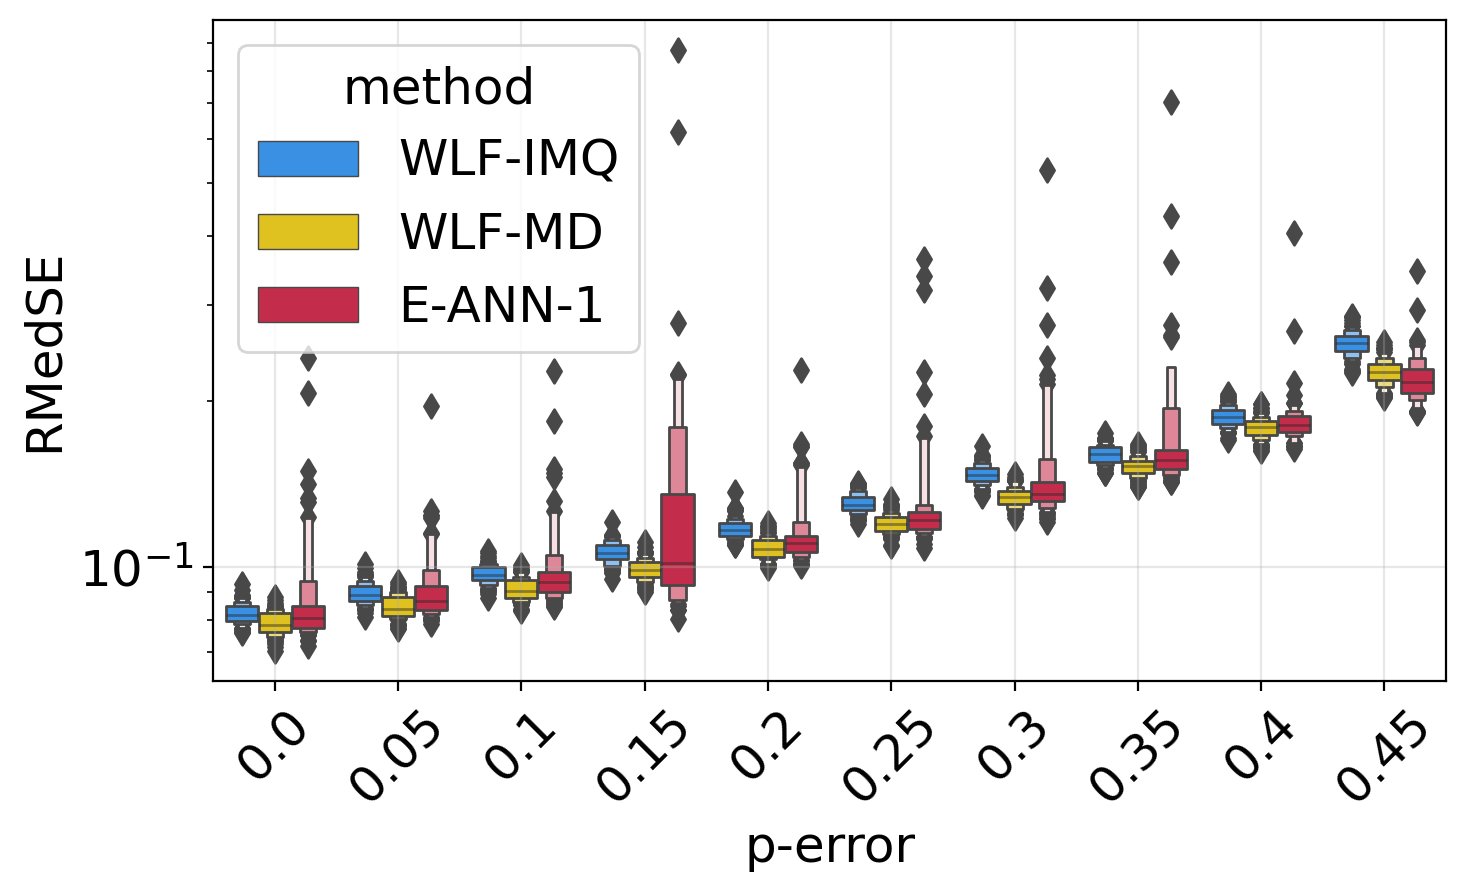

In [28]:
methods = sorted(df_all.method.unique())
fig, ax = plt.subplots(figsize=(6.4 * 1.2, 4.8))
sns.boxenplot(
    x="p_error", hue="method", y="RMedSE",
    data=(
        df_all
        # df_all.assign(p_error = np.clip(df_all["RMedSE"], 0.0, 1.0))
        .query("RMedSE < 1.0")
        .query("method not in @void_methods")
        .query("p_error < 0.5")
    ),
    palette=cmap,
    linewidth=1,
    # hue_order=methods
)
plt.yscale("log")
plt.xticks(rotation=45)
plt.xlabel("p-error")
# plt.legend(bbox_to_anchor=(1,1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f"./figures/{dataset_name}-corrosion.pdf")